## Lab 14 - Pagerank Algorithm

In [57]:
import numpy as np
import sympy as sy
from matplotlib import pyplot as plt
%matplotlib inline
import time

### Problem 1

In [4]:
def adjmat(filename):
    nnodes = 0
    pairs = []
    with open('./matrix.txt','r') as f:
        next(f) #Skip header
        for line in f:
            line = line.strip().split()
            nnodes = max(int(line[0]), int(line[1]), 0)
            pairs.append(line)
    adjmat = np.zeros((nnodes+1, nnodes+1))
    for k in range(len(pairs)):
        i = int(pairs[k][0])
        j = int(pairs[k][1])
        adjmat[i,j] = 1
    return adjmat

In [5]:
result = adjmat('matrix.txt')
result

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

### Problem 2

In [6]:
def K(array):
    rowsum = array.sum(axis=1)
    for i in range(len(rowsum)):
        if rowsum[i] == 0:
            array[i,:] = np.ones(len(rowsum))
    D = array.sum(axis=1)
    K = array.T / D
    return K


In [7]:
K(result)

array([[ 0.        ,  1.        ,  0.125     ,  0.33333333,  0.33333333,
         0.5       ,  1.        ,  1.        ],
       [ 0.        ,  0.        ,  0.125     ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.125     ,  0.33333333,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.125     ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.125     ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.125     ,  0.        ,  0.33333333,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.125     ,  0.33333333,  0.33333333,
         0.5       ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.125     ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ]])

### Problem 3

In [8]:
def pagerankiter(A,N = None, d = 0.85, tol = 1e-5):
    if N == None:
        adjmat = A
        nsize = A.shape[0]
    else:
        adjmat = A[:N,:N]
        nsize = N
    Kmat = K(adjmat)
    error = 1
    p = np.ones(nsize)/nsize
    while error > tol:
        pn = p
        p = d*Kmat.dot(p) + (1 - d)/nsize * np.ones(nsize)
        error = np.linalg.norm(p-pn)
    return p

In [9]:
pagerankiter(result)

array([ 0.43868966,  0.02171029,  0.02786154,  0.02171029,  0.02171029,
        0.02786154,  0.04585394,  0.39460246])

### Problem 4

In [10]:
from scipy import linalg as la

def pagerankeig(A, N= None, d = 0.85):
    if N == None:
        adjmat = A
        nsize = A.shape[0]
    else:
        adjmat = A[:N, :N]
        nsize = N
    Kmat = K(adjmat)
    B = d*Kmat + ((1 - d)/nsize) * np.ones((nsize, nsize))
    eig, eigvec = la.eig(B)
    return eigvec[:,0]/ sum(eigvec[:,0]) #Normalize to vector of probabilities

In [11]:
pagerankeig(result)

array([ 0.43869288,  0.02171029,  0.02786154,  0.02171029,  0.02171029,
        0.02786154,  0.04585394,  0.39459924])

### Problem 5

In [12]:
# Reading in Data
import pandas as pd

df = pd.read_csv('ncaa2013.csv', delimiter=',')
pairs = [tuple(x) for x in df.values]
pairs = np.asarray(pairs)
# List of names
names = np.unique(pairs)

adjmat = np.zeros((len(names), len(names)))

for k in range(len(pairs)):
    j, = np.where(names == pairs[k,0])
    i, = np.where(names == pairs[k,1])
    adjmat[i,j] = 1

In [13]:
res = pagerankiter(adjmat, d = 0.7)
teamranks = names[np.argsort(res)][::-1]
teamranks

array(['Duke', 'Butler', 'Louisville', 'Illinois', 'Indiana', 'Miami FL',
       'Syracuse', 'Ohio St', 'Michigan St', 'Kansas', 'Minnesota',
       'Michigan', 'Georgetown', 'Wisconsin', 'St Louis', 'New Mexico',
       'Virginia', 'Marquette', 'Notre Dame', 'NC State',
       'VA Commonwealth', 'Oklahoma St', 'Florida', 'Villanova', 'Temple',
       'Arizona', 'UNLV', 'Missouri', 'Cincinnati', 'Pittsburgh', 'Xavier',
       'UCLA', 'Connecticut', 'Colorado', 'Gonzaga', 'Creighton', 'Oregon',
       'San Diego St', 'Oklahoma', 'California', 'Wichita St', 'Maryland',
       'La Salle', 'Tennessee', 'Colorado St', 'North Carolina',
       'Kentucky', 'Indiana St', 'Mississippi', 'Boise St', 'Charlotte',
       'Iowa St', 'Baylor', 'Kansas St', 'Arkansas', 'Texas A&M', 'Iowa',
       'Georgia Tech', 'Air Force', 'Massachusetts', 'Florida St',
       'Memphis', 'Washington', 'Arizona St', 'USC', 'Wake Forest', 'Utah',
       'Alabama', "St John's", 'Northern Iowa', "St Mary's CA", 'Purdue

Our team ranks do match the correct values.

## Lab 10 - Conditioning and Stability

### Problem 1

In [14]:
def cond(A):
    U, s, vh = la.svd(A)
    if s.min() < 1e-8:
        return np.inf
    else:
        return s.max()/ s.min()

In [15]:
# Testing Against numpy.cond
A = np.array([[7,0.004],[0.005,1]])
print(cond(A) - np.linalg.cond(A))

# Testing Singular Matrix
A2 = np.array([[1,1],[1,1]]) # Singular Matrix
print(cond(A2))

# Testing Orthonormal Matrix
Q, R = la.qr(A)
print(cond(Q))

8.881784197e-16
inf
1.0


### Problem 2

In [17]:
def wilkinsonexp(n):
    w_roots = np.arange(1,21)
    # Get exact coefficients
    x, i = sy.symbols('x i')
    w = sy.poly_from_expr(sy.product(x-i, (i,1,20)))[0]
    w_coeffs = np.array(w.all_coeffs())
    condmat = np.zeros((n,2)) # Matrix to store cond numbers
    plt.plot(w_roots.real, w_roots.imag, "o", label = 'Original')
    for i in range(n):
        # Draw random integer for coefficient to perturb
        k =np.random.randint(0,21)
        # Draw random perturbation
        perturb = np.random.normal(1,1e-10)
        # Get new coefficients
        h = np.ones(21)
        h[k] = perturb
        new_coeffs = w_coeffs * h
        new_roots = np.roots(np.poly1d(new_coeffs))
        plt.plot(new_roots.real, new_roots.imag,"k,")
        #Absolute Cond Number
        condmat[i,0] = la.norm(new_roots - w_roots, np.inf) / la.norm(h, np.inf)
        condmat[i,1] = la.norm(w_coeffs, np.inf) / la.norm(w_roots, np.inf)
    plt.xlabel("Real")
    plt.ylabel("Imaginary")
    plt.title('Simulation')
    plt.show()
    return condmat

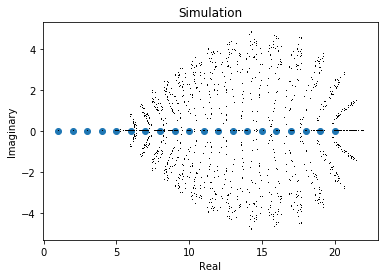

array([[  2.04220617e+01,   6.90187988e+17],
       [  1.90000000e+01,   6.90187988e+17],
       [  1.93827958e+01,   6.90187988e+17],
       [  2.01475964e+01,   6.90187988e+17],
       [  1.90004409e+01,   6.90187988e+17],
       [  1.93414842e+01,   6.90187988e+17],
       [  2.05281156e+01,   6.90187988e+17],
       [  1.93098099e+01,   6.90187988e+17],
       [  1.90000000e+01,   6.90187988e+17],
       [  1.95289551e+01,   6.90187988e+17],
       [  1.92019196e+01,   6.90187988e+17],
       [  1.91993765e+01,   6.90187988e+17],
       [  1.90070597e+01,   6.90187988e+17],
       [  2.03027895e+01,   6.90187988e+17],
       [  2.01714857e+01,   6.90187988e+17],
       [  1.95646348e+01,   6.90187988e+17],
       [  1.94449642e+01,   6.90187988e+17],
       [  2.01868143e+01,   6.90187988e+17],
       [  2.01442610e+01,   6.90187988e+17],
       [  1.90000000e+01,   6.90187988e+17],
       [  1.96129098e+01,   6.90187988e+17],
       [  1.99220811e+01,   6.90187988e+17],
       [  

In [18]:
wilkinsonexp(100)

### Problem 3

In [19]:
def eigenperturb(A):
    #Construct Perturation
    reals = np.random.normal(0, 1e-10, A.shape)
    imags = np.random.normal(0, 1e-10, A.shape)
    H = reals + 1j*imags
    l = la.eigvals(A) 
    lp = la.eigvals(A + H)
    abscon = np.linalg.norm(l - lp) / np.linalg.norm(H)
    relcon = np.linalg.norm(A) / np.linalg.norm(l) * abscon
    return abscon, relcon

### Problem 4

In [20]:
def relcon(bounds,res):
    xmin, xmax, ymin, ymax = bounds
    # Generate grid
    xgrid = np.linspace(xmin, xmax, res)
    ygrid = np.linspace(ymin, ymax, res)
    vals = np.zeros((res, res))
    for i in range(res):
        for j in range(res):
            x = xgrid[i]
            y = ygrid[j]
            A = np.array([[1,x],[y,1]])
            abscon, relcon = eigenperturb(A)
            vals[i,j] = relcon
    plt.pcolormesh(xgrid, ygrid, vals, cmap='gray_r')
    plt.colorbar()
    plt.show()


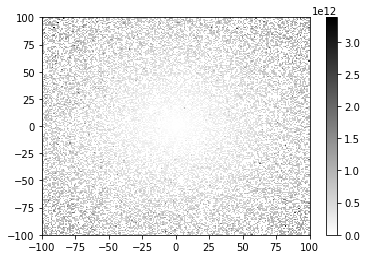

In [21]:
relcon((-100,100,-100,100), 200)

### Problem 5

In [22]:
def polytest(n, file):
    xk, yk = np.load(file).T
    A = np.vander(xk, n+1)
    # Solving using normal equations
    coeffs = la.inv((A.T.dot(A))).dot(A.T).dot(yk)
    fe = np.linalg.norm(A.dot(coeffs) - yk)
    # Solving using QR
    Q , R = la.qr(A, mode='economic')
    coeffs2 = la.solve_triangular(R, Q.T.dot(yk))
    fe2 = np.linalg.norm(A.dot(coeffs2) - yk)
    plt.plot(xk, yk, ".k")
    plt.plot(xk, np.polyval(coeffs,xk), label="Normal Equations")
    plt.plot(xk, np.polyval(coeffs2,xk), label = "QR Solver")
    plt.legend()
    plt.title("Fit of Data for Polynomial of Degree " + str(n))
    plt.show()
    return fe, fe2

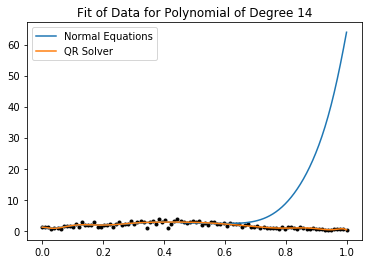

(152.14373083729362, 4.5683709417007901)

In [23]:
polytest(14, 'stability_data.npy')

As we can see, the forward errors for the QR algorithm are much smaller.

### Problem 6

In [24]:
def problem6():
    grid = np.arange(5,50,5)
    fe = np.zeros((len(grid)))
    x = sy.Symbol('x')
    for i in range(len(grid)):
        n = int(grid[i])
        result = float(sy.integrate(x**n * sy.exp(x-1),(x,0,1)).evalf())
        result2 = float(((-1 ** n) * sy.subfactorial(n) + (-1)**(n+1)*sy.factorial(n) / sy.exp(1)).evalf())
        fe[i] = abs(result2 - result)/abs(result)
    plt.plot(grid, fe)
    plt.yscale('log')
    plt.show()
    

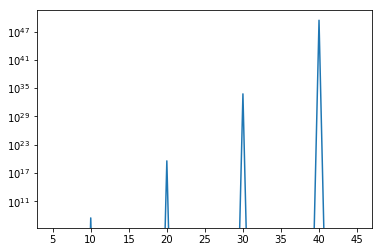

In [25]:
problem6()

We see that there are portions of n that have very high forward errors when computing via (10.6), which suggests that it is not a very numerically stable algorithm.

## Lab 8 - Numerical Differentiation

### Problem 1

In [26]:
x = sy.Symbol('x')
f = (sy.sin(x) + 1)**(sy.sin(sy.cos(x)))
derivative = sy.diff(f, x)
fl = sy.lambdify(x, f, 'numpy')
dl = sy.lambdify(x, derivative, 'numpy')

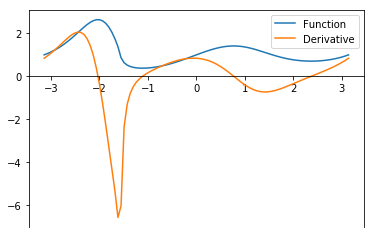

In [27]:
grid = np.linspace(-np.pi, np.pi,100)

ax = plt.gca()
ax.spines["bottom"].set_position("zero")
ax.plot(grid, fl(grid), label="Function")
ax.plot(grid, dl(grid), label="Derivative")
plt.legend()
plt.show()


### Problem 2

In [28]:
# Lets create functions to approximate the differences
def forward1(f, x, h):
    y = np.zeros_like(x)
    y = (f(x + h) - f(x)) / h
    return y

def forward2(f,x,h):
    y = (-3*f(x) + 4*f(x+h) - f(x+2*h))/(2*h)
    return y

def backward1(f,x,h):
    return (f(x) - f(x-h))/h

def backward2(f,x,h):
    return (3*f(x) - 4*f(x-h) + f(x-2*h))/(2*h)

def centered1(f,x,h):
    return (f(x+h) - f(x-h))/(2*h)

def centered2(f,x,h):
    return (f(x-2*h) - 8*f(x-h) + 8*f(x+h) - f(x + 2*h))/(12*h)

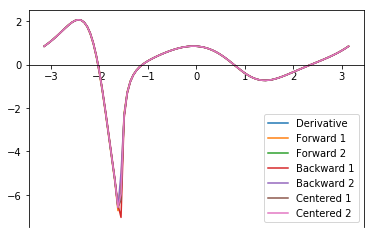

In [29]:
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
ax.plot(grid, dl(grid), label="Derivative")
ax.plot(grid, forward1(fl,grid,0.01), label="Forward 1")
ax.plot(grid, forward2(fl,grid,0.01), label="Forward 2")
ax.plot(grid, backward1(fl,grid,0.01), label="Backward 1")
ax.plot(grid, backward2(fl, grid, 0.01), label="Backward 2")
ax.plot(grid, centered1(fl, grid, 0.01), label = "Centered 1")
ax.plot(grid, centered2(fl, grid, 0.01), label = "Centered 2")
plt.legend()
plt.show()


All of our approximations approximate the original function closely.

### Problem 3

In [42]:
def problem3(x):
    logspace = np.logspace(-8,0,9)
    accx = dl(x)
    aerror = np.zeros((len(logspace), 6))
    for i in range(len(logspace)):
        aerror[i,0] = abs(forward1(fl, x, logspace[i]) - accx)
        aerror[i,1] = abs(forward2(fl, x, logspace[i]) - accx)
        aerror[i,2] = abs(backward1(fl, x, logspace[i]) - accx)
        aerror[i,3] = abs(backward2(fl,x,logspace[i]) - accx)
        aerror[i,4] = abs(centered1(fl, x, logspace[i]) - accx)
        aerror[i,5] = abs(centered2(fl, x, logspace[i]) - accx)
    plt.figure(figsize=(12,9))
    plt.loglog(logspace, aerror[:,0], label ="Order 1 Forward")
    plt.loglog(logspace, aerror[:,1], label ="Order 2 Forward")
    plt.loglog(logspace, aerror[:,2], label ="Order 1 Backward")
    plt.loglog(logspace, aerror[:,3], label ="Order 2 Backward")
    plt.loglog(logspace, aerror[:,4], label ="Order 1 Centered")
    plt.loglog(logspace, aerror[:,5], label ="Order 2 Centered")
    plt.legend()
    plt.show() 

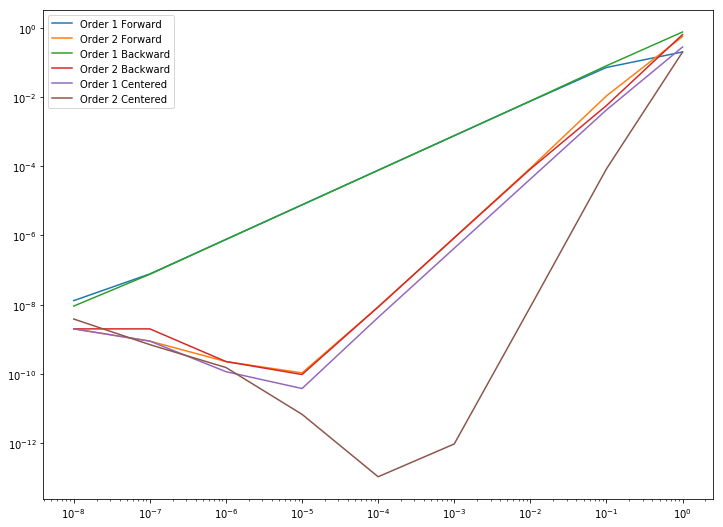

In [43]:
problem3(1)

### Problem 4

In [66]:
#Defining functions for x and y

a, b = sy.symbols('a b')
A = 500
x = A * sy.tan(b)/(sy.tan(b) - sy.tan(a))
y = A * (sy.tan(a)*sy.tan(b))/(sy.tan(b) - sy.tan(a))
xl = sy.lambdify((a, b), x, 'numpy')
yl = sy.lambdify((a, b), y, 'numpy')

In [67]:
xl(plane[0,1], plane[0,2])

1311.2713366014443

In [69]:
# Loading Plane Data
plane = np.load("plane.npy")
plane[:,1:] = np.deg2rad(plane[:,1:])

xyvelo = np.zeros_like(plane[:,1:])

xyvelo[0,0] = xl(plane[1,1], plane[1,2]) - xl(plane[0,1], plane[0,2])
xyvelo[0,1] = yl(plane[1,1], plane[1,2]) - yl(plane[0,1], plane[0,2])

for i in range(1,7):
    xyvelo[i,0] = (xl(plane[i+1,1], plane[i+1,2]) - xl(plane[i,1], plane[i,2]))/2
    xyvelo[i,1] = (yl(plane[i+1,1], plane[i+1,2]) - yl(plane[i,1], plane[i,2]))/2

xyvelo[7,0] = (xl(plane[7,1], plane[7,2]) - xl(plane[6,1], plane[6,2]))/2
xyvelo[7,1] = (yl(plane[7,1], plane[7,2]) - yl(plane[6,1], plane[6,2]))/2

print(xyvelo)

[[ 44.6651396   12.65826639]
 [ 22.99096106   6.11575545]
 [ 24.28930399   6.74734847]
 [ 24.071672     6.3358489 ]
 [ 22.57930216   6.13991136]
 [ 27.12121361   7.59917457]
 [ 24.77735554   7.03749401]
 [ 24.77735554   7.03749401]]


### Problem 5

In [80]:
#Defining function
def computejacobian(f, x, h):
    shape = len(x)
    identity = np.eye(len(x))
    mshape = len(f(x))
    jacobian = np.zeros((mshape, shape))
    for i in range(shape):
        for j in range(mshape):
            jacobian[j,i] = (f(x + h*identity[:,i])[j] - f(x)[j])/ h
    return jacobian

In [74]:
def f(xvec):
    return np.array([xvec[0]**2, xvec[1] - xvec[0]])

In [81]:
computejacobian(f,[1,1], 0.2)

array([[ 2.2,  0. ],
       [-1. ,  1. ]])

### Problem 6

In [95]:
from autograd import grad
import autograd.numpy as anp
import time

#Sympy implementation
x = sy.Symbol('x')
fsy = sy.log(sy.sqrt(sy.sin(sy.sqrt(x))))

starttime = time.clock()
grad_fsy = sy.diff(fsy,x)
grad_fsyl = sy.lambdify(x, grad_fsy,'numpy')
val = grad_fsyl(np.pi/4)
time1 = time.clock() - starttime
print("Sympy, Error = " + str(0) +"\tTime = " + str(time1))

#Autograd implementation
f = lambda x: anp.log(anp.sqrt(anp.sin(anp.sqrt(x))))

starttime = time.clock()
grad_f = grad(f)
val2 = grad_f(anp.pi/4)
time2 = time.clock() - starttime
autoerror = abs(val - val2)
print("Autograd, Error = " + str(autoerror) + "\tTime = " + str(time2))


#Second Order Centered Diff Quotient

starttime = time.clock()
val3 = (f(np.pi/4 + 0.01) - f(np.pi/4 - 0.01))/0.02
time3 = time.clock() - starttime
print("Second Order Diff, Error = " + str(abs(val3 - val)) + "\t Time = " + str(time3) )


Sympy, Error = 0	Time = 0.012713765548255651
Autograd, Error = 5.55111512313e-17	Time = 0.001208670364860609
Second Order Diff, Error = 1.717994095e-05	 Time = 0.000440360694994979


As expected, we have the longest time for sympy, and the shortest time for the second order difference quotient, as well as the best accuracy for sympy, and the worst accuracy for the second order difference quotient.

### Problem 7

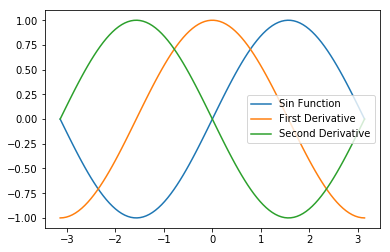

In [134]:
# Define the taylor series

def taylorsin(x, tol=0.0001):
    result = 0
    cur_term = x
    i = 1
    while anp.abs(cur_term) >= tol:
        cur_term = (((-1) ** (i-1)) * x ** (2*i -1)) / np.math.factorial(2*i -1)
        result += cur_term
        i += 1
    return result

d_taylorsin = grad(taylorsin)
d2_taylorsin = grad(d_taylorsin)

grid = np.linspace(-np.pi, np.pi, 100)

#Compute function and derivatives for plotting
sinfunc = np.zeros_like(grid)
dsinfunc = np.zeros_like(grid)
d2sinfunc = np.zeros_like(grid)
for i in range(len(grid)):
    sinfunc[i] = taylorsin(grid[i])
    dsinfunc[i] = d_taylorsin(grid[i])
    d2sinfunc[i] = d2_taylorsin(grid[i])
    
plt.plot(grid, sinfunc, label="Sin Function")
plt.plot(grid, dsinfunc, label = "First Derivative")
plt.plot(grid, d2sinfunc, label = "Second Derivative")
plt.legend()
plt.show()
    

These derivatives look like what we would expect.

### Problem 8

In [164]:
# Sympy solution

x, y = sy.symbols('x y')
f1 = sy.exp(x) *sy.sin(x) + y**3
f2 = 3*y - sy.cos(x)
F = sy.Matrix([f1,f2])

starttime = time.clock()
jacobian = F.jacobian([x,y]).subs([(x,1),(y,1)])
time1 = time.clock() - starttime
print("Sympy \tTime = " + str(time1))

# Second Order Centered Difference Quotient
def f(x,y):
    return anp.array([anp.exp(x)*anp.sin(y) + y **3, 3*y - anp.cos(x)])

starttime = time.clock()
jacobian2 = np.zeros((2,2))
jacobian2[:,0] =(f(1.01, 1) - f(0.99,1))/ 0.02
jacobian2[:,1] = (f(1,1.01) - f(1,0.99))/0.02
time2 = time.clock() - starttime
print("SOCDQ \tTime = " + str(time2))

#Autograd
from autograd import jacobian

f2 = lambda x: anp.array([anp.exp(x[0])*anp.sin(x[1]) + x[1]**3, 3*x[1] - anp.cos(x[0])])
starttime = time.clock()
jacobian3 = jacobian(f2)
result = jacobian3(anp.array([1.,1.]))
time3 = time.clock() - starttime
print("Autograd \tTime = " + str(time3))
print(result)


Sympy 	Time = 0.0028278878817218356
SOCDQ 	Time = 0.0018987805760843912
Autograd 	Time = 0.006888883457577322
[[ 2.28735529  4.46869394]
 [ 0.84147098  3.        ]]


### Lab - Numerical Integration

### Problem 1

In [181]:
def numint(f, a, b, N, method):
    #Break domain into n intervals
    xint = np.linspace(a,b,N)
    if method == 'Midpoint':
        result = 0
        for i in range(N-1):
            result += (b-a)/N * f((xint[i+1] + xint[i])/ 2)
        return result
    elif method == 'Trapezoid':
        vec = np.ones_like(xint)*2
        vec[0] = 1
        vec[N-1] = 1
        result = 0
        for i in range(N-1):
            result += (b-a)/(2*N) *(f(xint[i]) * vec[i])
        return result
    elif method == 'Simpsons':
        result = 0
        for i in range(N-1):
            result += (xint[i+1] - xint[i])/6 * (f(xint[i]) + 4*f((xint[i+1] + xint[i])/2) + f(xint[i+1]))
        return result
    else:
        raise ValueError("Please Specify a method of either Midpoint, Trapezoid or Simpsons")

f = lambda x: 0.1*x**4 - 1.5*x**3 + 0.53*x**2 + 2*x + 1

In [182]:
numint(f, -10, 10, 100, 'Simpsons')

4373.3333610938789

### Problem 2

In [196]:
from scipy import stats

def approxnormal(N, k, mu = 0, sigma = 1):
    nodes = np.linspace(mu - sigma*k, mu + sigma*k, N)
    weights = np.ones_like(nodes)
    weights[0] = stats.norm.cdf((nodes[1] + nodes[0])/2, mu, sigma)
    for i in range(1, N-1):
        zmin = (nodes[i-1] + nodes[i])/2
        zmax = (nodes[i] + nodes[i+1])/2
        weights[i] = stats.norm.cdf(zmax, mu, sigma) - stats.norm.cdf(zmin, mu, sigma)
    weights[N-1] = 1 - stats.norm.cdf((nodes[N-2] + nodes[N-1])/2, mu, sigma)
    return nodes, weights
    

In [197]:
approxnormal(11, 2)

(array([-2. , -1.6, -1.2, -0.8, -0.4,  0. ,  0.4,  0.8,  1.2,  1.6,  2. ]),
 array([ 0.03593032,  0.04482634,  0.07789859,  0.11559786,  0.14648717,
         0.15851942,  0.14648717,  0.11559786,  0.07789859,  0.04482634,
         0.03593032]))

### Problem 3

In [198]:
def approxlognormal(N, k, mu=0, sigma=1):
    nodes, weights = approxnormal(N, k, mu, sigma)
    nodes = np.exp(nodes)
    return nodes, weights

In [199]:
approxlognormal(11,2)

(array([ 0.13533528,  0.20189652,  0.30119421,  0.44932896,  0.67032005,
         1.        ,  1.4918247 ,  2.22554093,  3.32011692,  4.95303242,
         7.3890561 ]),
 array([ 0.03593032,  0.04482634,  0.07789859,  0.11559786,  0.14648717,
         0.15851942,  0.14648717,  0.11559786,  0.07789859,  0.04482634,
         0.03593032]))

### Problem 4

In [208]:
nodes, weights = approxlognormal(20, 2, 10.5, 0.8)
print("Discrete Estimation = " +str(np.sum(nodes*weights)) +", Exact Estimation = " + str(np.exp(10.5 + 0.8**2/2)))

Discrete Estimation = 48453.4129327, Exact Estimation = 50011.0870085


### Problem 5

In [239]:
# Lets take the results of gaussian quadrature online
w1 , w2, w3, x1, x2, x3 = 5/9, 8/9, 5/9, -1*np.sqrt(3/5), 0, np.sqrt(3/5)

f = lambda x: 0.1*x**4 - 1.5*x**3 + 0.53*x**2 + 2*x + 1
res = 10*(w1*f(10*x1) + w2*f(x2) + w3*f(10*x3))
print(res)

4373.33333333


### Problem 6

In [240]:
scipy.integrate.quad(f, -10, 10)

(4373.333333333334, 8.109531705284936e-11)

Both our computed guassian quadrature integration result and the scipy function return values for the integral which are almost exactly identical to the original integral, and are more accurate that our Newton-Cortes quadrature results.

### Problem 7

In [53]:
def montecarlo(g, omega, N):
    xmin, xmax, ymin, ymax = omega
    V = (xmax - xmin)*(ymax - ymin)
    draw = np.random.rand(N,2)
    draw[:,0] = xmin + draw[:,0] * (xmax - xmin)
    draw[:,1] = ymin + draw[:,1] * (ymax - ymin)
    result = 0
    for i in range(N):
        result += g(draw[i,:])
    return V/N * result

In [54]:
def g(xvec):
    x, y, = xvec
    if x**2 + y**2 <= 1:
        return 1
    else:
        return 0

In [55]:
#Lets interate on N until we get 4 decimal place accuracy.

tol = 0.0001
error = 1
N = 100
while error > tol:
    result = montecarlo(g, [-1,1,-1,1], N)
    error = abs(result - 3.1415)
    N += 100

print("Smallest N is " + str(N))

Smallest N is 18400


### Problem 8

In [74]:
def equiseq(n, d, sequence = 'Weyl'):
    prime = np.zeros(d)
    result = np.zeros(d)
    for i in range(d):
        prime[i] = sy.ntheory.generate.prime(i+1)
    if sequence == 'Weyl':
        for i in range(d):
            result[i] = n*np.sqrt(prime[i]) - np.floor(n*np.sqrt(prime[i]))
        return result
    elif sequence == 'Haber':
        for i in range(d):
            result[i] = (n*(n+1))/2 * np.sqrt(prime[i]) - np.floor((n*(n+1))/2 * np.sqrt(prime[i]))
        return result
    elif sequence == 'Niederreiter':
        for i in range(d):
            result[i] = n*2 **((i+1)/(i+2)) - np.floor(n*2 **((i+1)/(i+2)))
        return result
    elif sequence == 'Baker':
        for i in range(d):
            result[i] = n*np.exp(prime[i]) - np.floor(n*np.exp(prime[i]))
        return result
    else:
        raise ValueError("Sequence not supported. Try Weyl, Haber, Niederreiter or Baker")

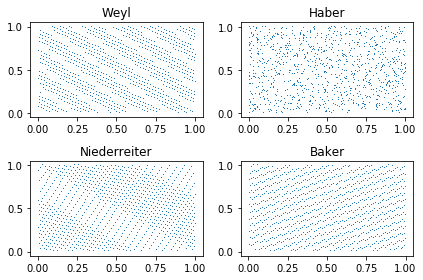

In [75]:
# Check graphs

graphWeyl = np.zeros((1000,2))
graphHaber = np.zeros((1000, 2))
graphNie = np.zeros((1000, 2))
graphBaker = np.zeros((1000, 2))
for i in range(1000):
    graphWeyl[i,:] = equiseq(i+1, 2, 'Weyl')
    graphHaber[i,:] = equiseq(i+1, 2, 'Haber')
    graphNie[i,:] = equiseq(i+1, 2, 'Niederreiter')
    graphBaker[i,:] = equiseq(i+1, 2, 'Baker')

plt.subplot(221)
plt.plot(graphWeyl[:,0], graphWeyl[:,1], ",")
plt.title("Weyl")
plt.subplot(222)
plt.plot(graphHaber[:,0], graphHaber[:,1], ",")
plt.title("Haber")
plt.subplot(223)
plt.plot(graphNie[:,0], graphNie[:,1], ",")
plt.title("Niederreiter")
plt.subplot(224)
plt.plot(graphBaker[:,0], graphBaker[:,1], ",")
plt.title("Baker")
plt.tight_layout()
plt.show()

### Problem 9

In [57]:
def pseudomontecarlo(g, omega, N):
    xmin, xmax, ymin, ymax = omega
    V = (xmax - xmin)*(ymax - ymin)
    draw = np.zeros((N,2))
    # Generate equisequence
    for j in range(N):
        draw[j,:] = equiseq(j+1, 2)

    draw[:,0] = xmin + draw[:,0] * (xmax - xmin)
    draw[:,1] = ymin + draw[:,1] * (ymax - ymin)
    result = 0
    for i in range(N):
        result += g(draw[i,:])
    return V/N * result

In [58]:
# Check convergence of pseudo montecarlo

tol = 0.0001
error = 1
N = 100
while error > tol:
    result = pseudomontecarlo(g, [-1,1,-1,1], N)
    error = abs(result - 3.1415)
    N += 100

print("Smallest N is " + str(N))

Smallest N is 5500


## Lab 11 - Simplex

We follow problems 1-6 in implementing a class which takes a linear optimization problem and solves it using the simplex method.

In [49]:
class linearopt(object):
    
    def __init__(self, c, A, b):
        self.A = A
        self.m, self.n = np.shape(A)
        self.b = b
        self.c = c
        
        #Check feasibility
        Ax = A.dot(np.zeros(self.n))
        if np.all(Ax - b > 0):
            raise ValueError("Problem is not Feasible at Origin")

        #Define slack variables
        self.vars = np.ones(self.m + self.n) #First m are slack variables, next n are original variables
        basic = list(range(self.n)) # Original variables are basic (i.e. = 0 at initial)
        nonbasic = list(range(self.n, self.m+self.n)) # Slack variables are non basic at initial
        self.L = nonbasic + basic # We order nonbasic variables over basic variables
        
        # Defining Tableau
        Abar = np.concatenate((A, np.eye(self.m)), axis = 1)
        cbar = np.reshape(np.hstack((-c, np.zeros(self.m))), (1, self.m+ self.n))
        t1 = np.reshape(np.hstack((0,b)),(self.m+1 ,1))
        t2 = np.concatenate((cbar, Abar), axis = 0)
        t3 = np.reshape(np.hstack((1, np.zeros(self.m))),(self.m + 1,1))
        self.tableau = np.concatenate((t1, t2, t3), axis = 1)
        self.tableau = self.tableau.astype(float)
        
    def pivotfinder(self, T):
        # Lets find pivot column
        j = np.where(T[0,1:] < 0)[0][0]
        j = j + 1
        # Now lets find row
        if len(np.where(T[1:,j] > 0)[0]) == 0:
            raise ValueError("Problem Unbounded")
        idx = np.where(T[1:,j] > 0)[0]
        idx = idx + 1
        temp = 10000
        for i in idx:
            val = T[i,0] / T[i,j]
            if val < temp:
                temp = val
                k = i
        return k+1, j-1 #Adjust for skipping first row and first column
    
    def pivot(self, T):
        # Function to run pivot and update tableau once
        
        #Update basic and nonbasic variable list
        i, j = self.pivotfinder(T)
        a, b = self.L.index(i), self.L.index(j)
        self.L[b], self.L[a] = self.L[a], self.L[b]
        
        # Row operations
        T[i-1,:] = T[i-1,:] / T[i-1,j+1]
        for k in range(self.m+1):
            if k != i-1 and T[i-1,j+1] != 0:
                scale = T[k,j+1] / T[i-1, j+1]
                T[k,:] = T[k,:] - scale*T[i-1,:]
        return T

    def solve(self):
        T = self.tableau
        while np.any(T[0,1:] < 0):
            newT = self.pivot(T)
            T = newT
        basicdict = dict(zip(self.L[:self.m],T[1:,0].tolist()))
        nobasicdict = dict(zip(self.L[self.m:],np.zeros(self.n).tolist()))
        return T[0,0], basicdict, nobasicdict

In [34]:
A = np.array([[1,-1],[3,1],[4,3]])
c = np.array([3,2])
b = np.array([2,5,7])

res = linearopt(c, A, b)

res.solve()

(5.2000000000000002,
 {0: 1.6, 1: 0.19999999999999982, 2: 0.5999999999999996},
 {3: 0.0, 4: 0.0})

In [40]:
productMix = np.load('productMix.npz')
Amat = productMix['A']
cmat = productMix['p']
mmat = productMix['m']
dmat = productMix['d']

In [51]:
b = np.concatenate((mmat, dmat))
A = np.concatenate((Amat, np.eye(4)))

productmix = linearopt(cmat, A, b)
productmix.solve()

(7453.5964912280706,
 {0: 1.7894736842105292,
  2: 10.0,
  4: 6.192982456140348,
  6: 0.9659649122807016,
  8: 13.807017543859653,
  9: 12.0,
  10: 8.21052631578947},
 {1: 0.0, 3: 0.0, 5: 0.0, 7: 0.0})

Our solver tells us to produce 1.79 units of the first product, and 10 units of the third product, and no other products given the constraints and prices.

## Lab 13 - Line Search

### Problem 1

In [61]:
def gisearch(f, a, b ,niter=50):
    p = 0.5*(3 - np.sqrt(5))
    n = 0
    while n < niter:
        aprime = a + p*(b-a)
        bprime = a + (1-p)*(b-a)
        if f(aprime) > f(bprime):
            a  = aprime
        else:
            b = bprime
        n += 1
    return (a+b)/2

In [69]:
f = lambda x: np.exp(x) - 4*x

error = 1
tol = 0.001
n = 1
true = np.log(4)
st = time.clock()
while error > tol:
    val = gisearch(f, 0,3,n)
    error = abs(true - val)
    n += 1
tottime = time.clock() - st
print("Number of steps to come within 0.001 of true minimizer = " + str(n))
print("Time Taken = " + str(tottime))

Number of steps to come within 0.001 of true minimizer = 14
Time Taken = 0.0028777400356787552


### Problem 2

In [114]:
# The lab asks us to create a function which takes input f,
#but the bisection method used on a minimizer clearly
#requires the derivative fprime
def bisect(fprime, a, b, niter=50):
    n = 0 
    while n < niter:
        x1 = (a + b)/2
        if fprime(x1) > 0:
            b = x1
        else:
            a = x1
        n += 1
    return x1

In [119]:
fprime = lambda x: np.exp(x) - 4
error = 1
tol = 0.001
n = 1
true = np.log(4)
st = time.clock()
while error > tol:
    val = bisect(fprime, 0,3,n)
    error = abs(true - val)
    n += 1
tottime =  time.clock() - st
print("Number of steps to come within 0.001 of true minimizer = " + str(n))
print("Time Taken = " + str(tottime))

Number of steps to come within 0.001 of true minimizer = 11
Time Taken = 0.001340631949346971


### Problem 3

In [120]:
def newton(f, f1, f2, x0, tol = 1e-6, maxiter = 100):
    it = 0
    error = 1
    while error > tol and it < maxiter:
        x1 = x0 - f1(x0) / f2(x0)
        error = abs(x1 - x0)
        it += 1
        x0 = x1
    return x0

In [154]:
f = lambda x: x**2 + np.sin(5*x)
f1 = lambda x: 2*x + 5*np.cos(5*x)
f2 = lambda x: 2 - 25*np.sin(5*x)

newton(f, f1, f2,- 0.1)

-0.29083931499532345

Comparing our code to the scipy.optim.minimize function, we see that a guess of 0 will not put us on the right point. Rather, we need to guess some x0 about -0.1 to get the global minimizer. This is because the function here has multiple local minum, and what Newton's method gives us is some local minimum/maximum where the first derivative is 0.

### Problem 4

In [145]:
def secant(f, f1, x0, x1, tol = 1e-6, maxiter =100):
    it = 0
    error = 1
    while error > tol and it < maxiter:
            f2approx = (f1(x1) - f1(x0))/ (x1 - x0)
            x2 = x1 - f1(x1)/f2approx
            error = abs(x2 - x1)
            it += 1
            x0 = x1
            x1 = x2
    return x2

In [156]:
f = lambda x: x**2 + np.sin(x) + np.sin(10*x)
f1 = lambda x: 2*x + np.cos(x) + 10*np.sin(10*x)

secant(f, f1, 0, -1)

0.3302945465826273

Once again we note that our secant method again does not return the global minizer given the bounds provided. This is because that the function is oscillatory and has many local minima and maxima, just like in problem 5

### Problem 5

In [157]:
def backtrack(f, f1, x0, p, c = 1, alpha = 1, rho = 0.8):
    while f(x + alpha*p) < f(x) + c*alpha*f1(x).dot(p):
        alpha = rho*alpha
    return alpha
    

## Lab 9 - Newton's Method

### Problem 1

In [158]:
def newton9(f, f1, x0, tol=1e-05, maxit = 15):
    it = 0
    error = 1
    while error > tol and it < maxit:
        x1 = x0 - f(x0)/f1(x0)
        error = abs(x1 - x0)
        x0 = x1
        it += 1
    return x0, it < maxit, it
    

In [160]:
f = lambda x: np.exp(x) - 2
f1 = lambda x: np.exp(x)

newton9(f, f1, 1)

(0.69314718056002544, True, 4)

### Problem 2

In [200]:
def problem2(n1, n2, p1, p2):
    f = lambda x: p1*((1+x)**n1 - 1) - p2*(1 - (1+x)**(-n2))
    f1 = lambda x: n1*p1*(1+x)**(n1-1) - p2*n2*(1 + x) **(-n2 -1)
    value, converged, iteration = newton9(f, f1, 0.1)
    return value

In [201]:
problem2(30, 20, 2000, 8000)

0.03877843223027751

### Problem 3

In [80]:
def newtonbacktrack(f, f1, x0, alpha, tol=1e-5, maxiter=15):
    it = 0
    error = 1
    while error > tol and it < maxiter:
        x1 = x0 - alpha*f(x0)/f1(x0)
        error = abs(x1 - x0)
        x0 = x1
        it += 1
    return x0, it < maxiter, it

In [177]:
f = lambda x: np.sign(x)*np.power(np.abs(x), 1./3)
f1 = lambda x: (1/3)*np.sign(x)*np.power(np.abs(x),1./3 - 1)

print(newtonbacktrack(f, f1, 0.01,1, maxiter = 30))
print(newtonbacktrack(f, f1, 0.01, 0.3, maxiter = 30))

(-5764607523034350.0, False, 30)
(1.0000000000000158e-06, True, 4)


Once again, we set $\alpha = 0.2$ to get convergence for the function.

### Problem 4

In [81]:
f = lambda x: np.sign(x)*np.power(np.abs(x), 1./3)
f1 = lambda x: (1/3)*np.sign(x)*np.power(np.abs(x),1./3 - 1)

def problem4(f, f1, x0, tol=1e-5, maxiter=15):
    alphaspace = np.linspace(0.2, 0.5, 50)
    alphavalue = np.ones_like(alphaspace)
    for i in range(50):
        alphavalue[i] = newtonbacktrack(f, f1, x0, alphaspace[i], maxiter= maxiter)[2]
    plt.plot(alphaspace, alphavalue)

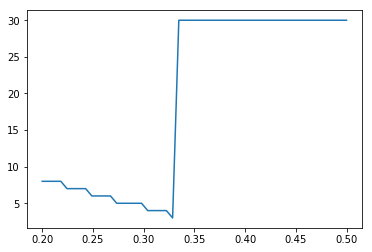

In [198]:
problem4(f, f1, 0.01, maxiter = 30)

As we guessed, our ideal value is about 0.325.

### Problem 5

In [101]:
def newtonvec(f, f1, x0, tol=1e-05, maxit = 15):
    it = 0
    error = 1
    while error > tol and it < maxit:
        if np.isscalar(x0):
            x1 = x0 - f(x0)/f1(x0)
            error = abs(x1 - x0)
            x0 = x1
            it += 1
        else:
            y = np.linalg.solve(f1(x0), f(x0))
            x1 = x0 - y
            error = np.linalg.norm(x1 - x0)
            x0 = x1
            it += 1
            
    return x0, it < maxit, it

def newtonvecbt(f, f1, x0, alpha = 1, tol=1e-05, maxit = 15):
    it = 0
    error = 1
    while error > tol and it < maxit:
        if np.isscalar(x0):
            x1 = x0 - alpha*f(x0)/f1(x0)
            error = abs(x1 - x0)
            x0 = x1
            it += 1
        else:
            y = np.linalg.solve(f1(x0), f(x0))
            x1 = x0 - alpha*y
            error = np.linalg.norm(x1 - x0)
            x0 = x1
            it += 1
            
    return x0, it < maxit, it

We can simply substitute the functions in for problems 2 and  4 to see that they still work.

### Problem 6

In [121]:
gamma = 0.5
delta = 1

def bioremed(xvec):
    yvec = np.zeros_like(xvec)
    yvec[0] = gamma*xvec[0]*xvec[1] - xvec[0]*(1 + xvec[1])
    yvec[1] = - xvec[0]*xvec[1] + (delta - xvec[1])*(1 + xvec[1])
    return yvec

def bioremed1(xvec):
    yvec = np.zeros((2,2))
    yvec[0,0] = gamma*xvec[1] - ( 1 + xvec[1])
    yvec[0,1] = gamma*xvec[0] - xvec[0]
    yvec[1,0] = - xvec[1]
    yvec[1,1] = -xvec[0] + delta - 1  - 2*xvec[1]
    return yvec

In [122]:
def problem6(sol, alpha, dens = 50):
    xgrid = np.linspace(-1/4, 0, dens)
    ygrid = np.linspace(0, 1/4, dens)
    xv, yv = np.meshgrid(xgrid, ygrid)
    xv, yv = np.reshape(xv, (dens**2)), np.reshape(yv, (dens**2))
    grid = np.vstack((xv, yv))
    x1, y1 = sol
    tol = 1e-06
    error = 1
    it = 0
    while error > tol and it < dens**2-1:
        it += 1
        try:
            xans, yans = newtonvecbt(bioremed, bioremed1, grid[:,it], alpha)[0]
            error = max(abs(xans - x1), abs(yans - y1))
        except np.linalg.linalg.LinAlgError as err:
            error = 1
    return grid[:,it]

In [124]:
print("Starting Point for [0,1] = " + str(problem6([0,1], 1)))
print("Starting Point for [0,-1] = " + str(problem6([0,-1], 1)))
print("Starting Point for [3.75,0.25] = " + str(problem6([3.75, 0.25], 0.55)))

Starting Point for [0,1] = [-0.22222222  0.        ]
Starting Point for [0,-1] = [-0.19444444  0.        ]
Starting Point for [3.75,0.25] = [ 0.    0.25]


### Problem 7

In [269]:
def basinsofattraction(f, fprime, roots, bounds, res, maxiter = 30):
    rmin, rmax, imin, imax = bounds
    x_real = np.linspace(rmin, rmax, res)
    x_imag = np.linspace(imin, imax, res)
    X_real, X_imag = np.meshgrid(x_real, x_imag)
    X_0 = X_real + 1j*X_imag
    
    it = 0
    while it < maxiter:
        X_1 = X_0 - f(X_0)/fprime(X_0)
        X_0 = X_1
        it += 1
    
    Y = np.zeros((res, res))
    for i in range(res):
        for j in range(res):
            Y[i,j] = np.argmin(abs(roots - X_0[i,j]))
    
    plt.pcolormesh(X_real, X_imag, Y, cmap = 'brg')

In [259]:
f = lambda x: x**3 - 1
Df = lambda x: 3*x**2
roots1 = np.array([1, -1./2 + 1j*np.sqrt(3)/2, -1/2 - 1j*np.sqrt(3)/2])
bounds = [-1.5,1.5,-1.5,1.5]

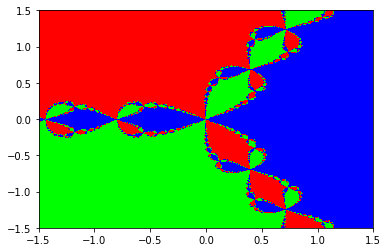

In [271]:
basinsofattraction(f, Df, roots1, bounds, 1000)

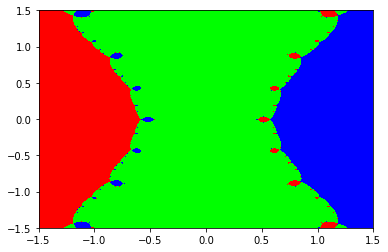

In [272]:
f2 = lambda x: x**3 - x
Df2 = lambda x: 3*x**2 - 1
roots2 = np.array([1, -1, 0])

basinsofattraction(f2, Df2, roots2, bounds, 1000)

## Lab 16 - Iterative Solvers

In [6]:
import scipy.linalg as la

### Problem 1

In [5]:
def Jacobi(A, b, tol=1e-6, maxiter=30, plot = False):
    error = 1
    it = 0
    D = np.diag(A)
    Dinv = np.diag(1/D)
    x = np.zeros(np.shape(b)[0])
    abserror = np.zeros(maxiter)
    while error > tol and it < maxiter:
        x1 = x + Dinv.dot((b - A.dot(x)))
        error = la.norm(x1 - x, np.inf)
        abserror[it] = la.norm(A.dot(x) - b, np.inf)
        x = x1
        it += 1
    if plot == True:
        plt.semilogy(list(range(maxiter)), abserror)
        plt.xlabel("Iteration")
        plt.ylabel("Absolute Error of Approximation")
        plt.title("Convergence of Jacobi Method")
    return x

In [7]:
def diag_dom(n, num_entries=None):
    if num_entries is None:
        num_entries = int(n**1.5) - n
    A = np.zeros((n,n))
    rows = np.random.choice(np.arange(0,n), size = num_entries)
    cols = np.random.choice(np.arange(0,n), size = num_entries)
    data = np.random.randint(-4, 4, size = num_entries)
    for i in range(num_entries):
        A[rows[i],cols[i]] = data[i]
    for i in range(n):
        A[i,i] = np.sum(np.abs(A[i])) + 1
    return A

In [306]:
b = np.random.random(10)
A = diag_dom(10)

x = Jacobi(A, b)
np.allclose(b, A.dot(x))

True

### Problem 2


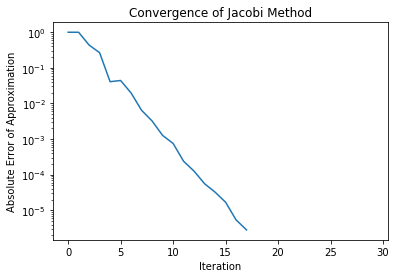

In [315]:
#We modify the function as required.

x = Jacobi(A, b, plot=True)

### Problem 3

In [76]:
def gaussseidel(A, b, tol=1e-8, maxiter=50, plot=False):
    error = 1
    it = 0
    n = np.shape(b)[0]
    x = np.zeros(n)
    abserror = np.zeros(maxiter)
    
    while error > tol and it < maxiter:
        x_new = np.zeros_like(x)
        x0 = np.copy(x)
        for i in range(n):
            #s1 = np.dot(A[i,:i], x_new[:i])
            #s2 = np.dot(A[i,i+1:], x[i + 1:])
            #x_new[i] = (b[i] - s1 - s2)/A[i,i]
            x[i] = x[i] + (b[i] - A[i,:].dot(x))/A[i,i]
            
        error = la.norm(x - x0, np.inf)
        abserror[it] = la.norm(A.dot(x) - b, np.inf)
       # x = x_new
        it += 1
        
    if plot == True:
        plt.semilogy(list(range(maxiter)), abserror)
        plt.xlabel("Iteration")
        plt.ylabel("Absolute Error of Approximation")
        plt.title("Convergence of GS Method")
    return x

True

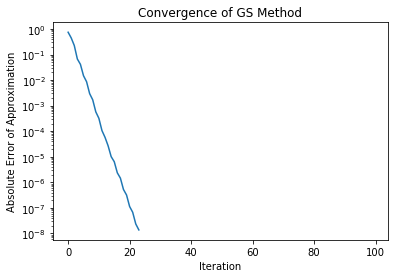

In [77]:
b2 = np.random.random(10)
A2 = diag_dom(10)
x2 = gaussseidel(A2, b2, maxiter = 100, plot = True)
val = A2.dot(x2)
np.allclose(val ,b2)

### Problem 4

In [11]:
def gaussseidelsparse(A,b, tol=1e-6, maxiter=50):
    error = 1
    it = 0
    n = np.shape(b)[0]
    x = np.zeros(n)
    
    while error > tol and it < maxiter:
        x0  = np.copy(x)
        for i in range(n):
            rowstart = A.indptr[i]
            rowend = A.indptr[i+1]
            Aix = A.data[rowstart:rowend] @ x[A.indices[rowstart:rowend]]
            x[i] += 1/A[i,i]*(b[i] - Aix)
        error = la.norm(x - x0, np.inf)
        it += 1
        
    return x


In [12]:
from scipy import sparse
A = sparse.csr_matrix(diag_dom(5000))
b = np.random.random(5000)

In [13]:
res = gaussseidelsparse(A, b)

### Problem 5

In [14]:
def sorsparse(A,b, w, tol=1e-6, maxiter=50):
    error = 1
    it = 0
    n = np.shape(b)[0]
    x = np.zeros(n)
    
    while error > tol and it < maxiter:
        x0  = np.copy(x)
        for i in range(n):
            rowstart = A.indptr[i]
            rowend = A.indptr[i+1]
            Aix = A.data[rowstart:rowend] @ x[A.indices[rowstart:rowend]]
            x[i] += w/A[i,i]*(b[i] - Aix)
        error = la.norm(x - x0, np.inf)
        it += 1
        
    return x, it

### Problem 6

In [48]:
def heat(n, w, tol = 1e-8, maxiter = 100, plot = False):
    # Generate A
    B = sparse.diags(np.ones(n)*-4) + sparse.diags(np.ones(n-1), -1) + sparse.diags(np.ones(n-1), 1)
    diags = []
    for i in range(n):
        diags.append(B)
    A = sparse.block_diag(diags)
    A = A + sparse.diags(np.ones(n**2 - n), n) + sparse.diags(np.ones(n**2 - n), -(n))
    #Generate b
    b = np.zeros(n)
    b[0] = -100
    b[n-1] = -100
    b = np.tile(b, n)
    #Solve System
    u, it = sorsparse(A, b, w, tol, maxiter)
    #Plot
    if plot == True:
        plt.pcolormesh(np.arange(0,n), np.arange(0,n), np.reshape(u, (n,n)), cmap = 'coolwarm')
    return u, it

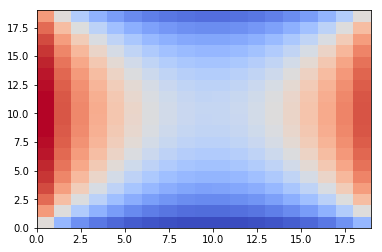

In [51]:
u, it = heat(20,1, plot = True)

### Problem 7

In [54]:
wgrid = np.arange(1,2, 0.05)
itgrid = np.zeros_like(wgrid)

for i in range(len(wgrid)):
    u, it = heat(20, wgrid[i], tol = 1e-2, maxiter = 1000)
    itgrid[i] = it
    

Minimum Relaxation Factor = 1.75


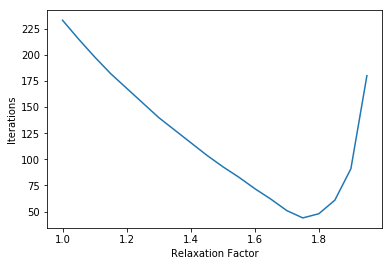

In [56]:
plt.plot(wgrid, itgrid)
plt.xlabel("Relaxation Factor")
plt.ylabel("Iterations")

print("Minimum Relaxation Factor = " + str(wgrid[np.argmin(itgrid)]))